In [112]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import pandas as pd
import numpy as np

import folium

import os
print(os.listdir("../input"))

['ipldata', 'ipl2020-players-dataset']


In [113]:
data=pd.read_csv('../input/ipldata/matches.csv',index_col=0)
print(data.shape)

deliveries=pd.read_csv('../input/ipldata/deliveries.csv',index_col=0)
print(deliveries.shape)

(756, 17)
(179078, 20)


In [114]:
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Let's look at cities to have hosted a IPL GAME**

In [115]:
data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

**Two points:**

*** 1. There are 7 NaN values. On closer inspection we find all NaN values belong to venue of Dubai International Cricket Stadium ***

*** 2. Bangalore underwent a name change to Bengaluru ***

In [116]:
data[data['city'].isnull()==True]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [117]:
data['city'].fillna('Dubai',inplace=True)

In [118]:
data.at[data['city']=='Bangalore','city']='Bengaluru'

In [119]:
print("Cities --> ",data['city'].nunique())
print("Venues --> ",data['venue'].nunique())

Cities -->  32
Venues -->  41


In [120]:
data.groupby(['city','venue']).all().index.to_frame(index=None)

,city,venue
0,Abu Dhabi,Sheikh Zayed Stadium
1,Ahmedabad,"Sardar Patel Stadium, Motera"
2,Bengaluru,M Chinnaswamy Stadium
3,Bengaluru,M. Chinnaswamy Stadium
4,Bloemfontein,OUTsurance Oval
5,Cape Town,Newlands
6,Centurion,SuperSport Park
7,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
8,Chandigarh,"Punjab Cricket Association Stadium, Mohali"
9,Chennai,M. A. Chidambaram Stadium


In [121]:
data.at[data['city']=='Visakhapatnam','venue']='ACA-VDCA Stadium'
data.at[data['city']=='Pune','venue']='Maharashtra Cricket Association Stadium'
data.at[data['city']=='Chandigarh','city']='Mohali'
data.at[data['city']=='Mohali','venue']='IS Bindra Stadium'
data.at[data['city']=='Hyderabad','venue']='Rajiv Gandhi International Stadium, Uppal'
data.at[data['city']=='Delhi','venue']='Feroz Shah Kotla Ground'
data.at[data['city']=='Chennai','venue']='M. A. Chidambaram Stadium'
data.at[data['city']=='Bengaluru','venue']='M Chinnaswamy Stadium'

In [122]:
print("Cities --> ",data['city'].nunique())
print("Venues --> ",data['venue'].nunique())

Cities -->  31
Venues -->  33


In [123]:
venues = data['venue'].unique()

In [124]:
import requests
import urllib.parse

lat = []
long = []

for i in range(len(venues)):
    address = venues[i]
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    if not len(response)==0:
        lat.append(response[0]["lat"])
        long.append(response[0]["lon"])
    else:
        lat.append('None')
        long.append('None')        

In [125]:
venues_map = pd.DataFrame({'Venues':venues,'Latitude':lat,'Longitude':long})
venues_map

,Venues,Latitude,Longitude
0,"Rajiv Gandhi International Stadium, Uppal",None,None
1,Maharashtra Cricket Association Stadium,18.6738164,73.7064113964208
2,Saurashtra Cricket Association Stadium,22.362785549999998,70.71008439911074
3,Holkar Cricket Stadium,22.72425115,75.87967028307291
4,M Chinnaswamy Stadium,12.97881265,77.59957750299715
5,Wankhede Stadium,18.9385497,72.82574081674653
6,Eden Gardens,22.564561349999998,88.34424156337812
7,Feroz Shah Kotla Ground,28.63753095,77.24293445747605
8,IS Bindra Stadium,30.69085905,76.7374305321502
9,Green Park,51.5066192,-0.1429113


In [126]:
def val(loc):
    address = loc
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    res = requests.get(url).json()
    return [res[0]["lat"],res[0]["lon"]]

In [127]:
venues_map.loc[venues_map['Venues']=='Rajiv Gandhi International Stadium, Uppal',['Latitude','Longitude']]

,Latitude,Longitude
0,None,None


In [128]:
venues_map.loc[venues_map['Venues']=='Rajiv Gandhi International Stadium, Uppal',['Latitude','Longitude']] = val('Rajiv Gandhi International Stadium')
venues_map.loc[venues_map['Venues']=='Dr DY Patil Sports Academy',['Latitude','Longitude']] = val('Dr DY Patil Sports')
venues_map.loc[venues_map['Venues']=='OUTsurance Oval',['Latitude','Longitude']] = val('OUTsurance')
venues_map.loc[venues_map['Venues']=='Vidarbha Cricket Association Stadium, Jamtha',['Latitude','Longitude']] = val('Vidarbha Cricket Association Stadium')
venues_map.loc[venues_map['Venues']=='New Wanderers Stadium',['Latitude','Longitude']] = val('Johannesburg Stadium')
venues_map.loc[venues_map['Venues']=='Kingsmead',['Latitude','Longitude']] = val('Kingsmead Stadium')
venues_map.loc[venues_map['Venues']=='Green Park',['Latitude','Longitude']] = val('green park stadium')

In [129]:
venues_map.head()

,Venues,Latitude,Longitude
0,"Rajiv Gandhi International Stadium, Uppal",19.028544850000003,73.04427053955325
1,Maharashtra Cricket Association Stadium,18.6738164,73.7064113964208
2,Saurashtra Cricket Association Stadium,22.362785549999998,70.71008439911074
3,Holkar Cricket Stadium,22.72425115,75.87967028307291
4,M Chinnaswamy Stadium,12.97881265,77.59957750299715


In [130]:
def data_pre(cord):
    return float(str(cord)[0:5])

venues_map['Latitude']  = venues_map['Latitude'].apply(data_pre).astype('float')
venues_map['Longitude'] = venues_map['Longitude'].apply(data_pre).astype('float')
venues_map

,Venues,Latitude,Longitude
0,"Rajiv Gandhi International Stadium, Uppal",19.02,73.04
1,Maharashtra Cricket Association Stadium,18.67,73.70
2,Saurashtra Cricket Association Stadium,22.36,70.71
3,Holkar Cricket Stadium,22.72,75.87
4,M Chinnaswamy Stadium,12.97,77.59
5,Wankhede Stadium,18.93,72.82
6,Eden Gardens,22.56,88.34
7,Feroz Shah Kotla Ground,28.63,77.24
8,IS Bindra Stadium,30.69,76.73
9,Green Park,26.48,80.34


In [131]:
stadiums = folium.Map(location = [20.5937,78.9629],zoom_start=4.5)

for state,lat,long in zip(list(venues_map['Venues']),list(venues_map['Latitude']),list(venues_map['Longitude'])):
#     print(state,lat,long)
    folium.CircleMarker(location = [lat,long],
                       radius = 5,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(stadiums)
    folium.Marker(location = [lat,long],
                  popup=folium.Popup(('<strong><b>State  : '+state+'</strong>'),max_width=200)).add_to(stadiums)  

In [132]:
stadiums

<center><font size=4><b>Total no. of wins by each team</b></font></center>

In [133]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [134]:
data['team1'].nunique()

15

In [135]:
data[(data['team1']=='Kochi Tuskers Kerala') | (data['team2']=='Kochi Tuskers Kerala')].shape

(14, 17)

- 'Rising Pune Supergiant' and 'Rising Pune Supergiants' is the same team
- 'Delhi Capitals' and 'Delhi Daredevils' is the same team
- 'Deccan Chargers' and 'Sunrisers Hyderabad' are of based in same city. And players were retained even though management changed

In [136]:
data.at[data['team1']=='Rising Pune Supergiant','team1']='Rising Pune Supergiants'
data.at[data['team2']=='Rising Pune Supergiant','team2']='Rising Pune Supergiants'
data.at[data['winner']=='Rising Pune Supergiant','winner']='Rising Pune Supergiants'

data.at[data['team1']=='Delhi Daredevils','team1']='Delhi Capitals'
data.at[data['team2']=='Delhi Daredevils','team2']='Delhi Capitals'
data.at[data['winner']=='Delhi Daredevils','winner']='Delhi Capitals'


data.at[data['team1']=='Deccan Chargers','team1']='Sunrisers Hyderabad'
data.at[data['team2']=='Deccan Chargers','team2']='Sunrisers Hyderabad'
data.at[data['winner']=='Deccan Chargers','winner']='Sunrisers Hyderabad'


In [137]:
data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan], dtype=object)

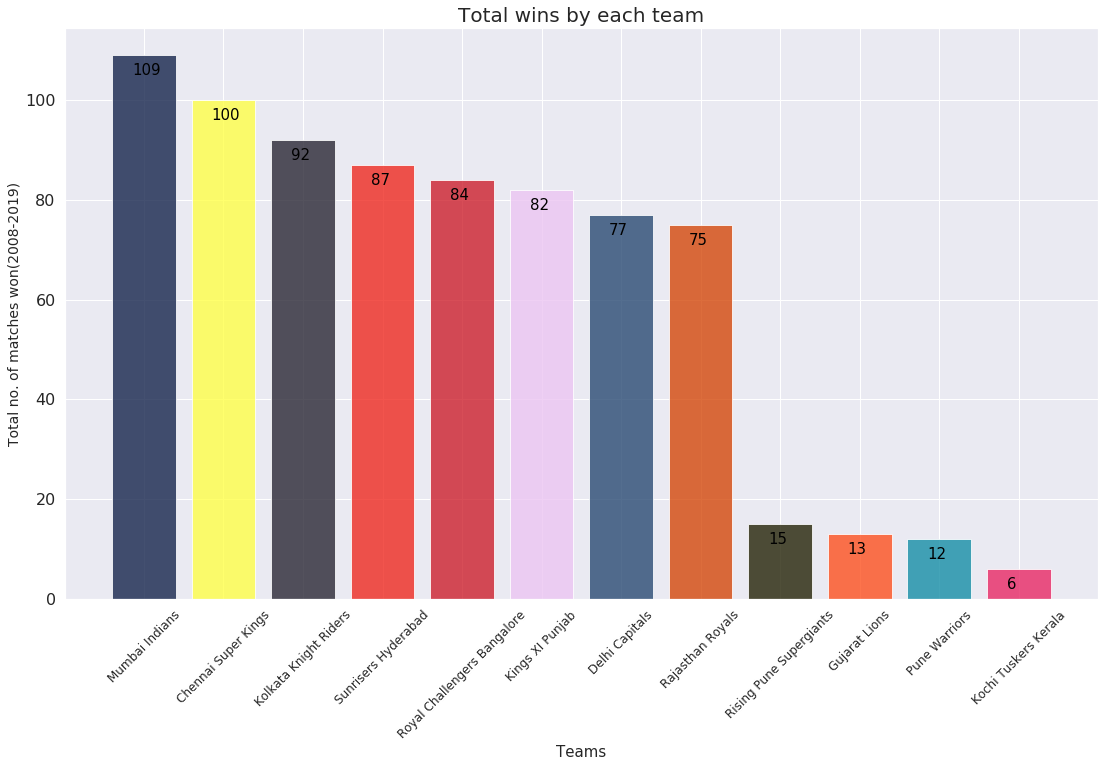

In [138]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=0)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

<center><font size=4><b>Top 20 players with most MOM awards</b></font></center>

Text(0, 0.5, 'Players')

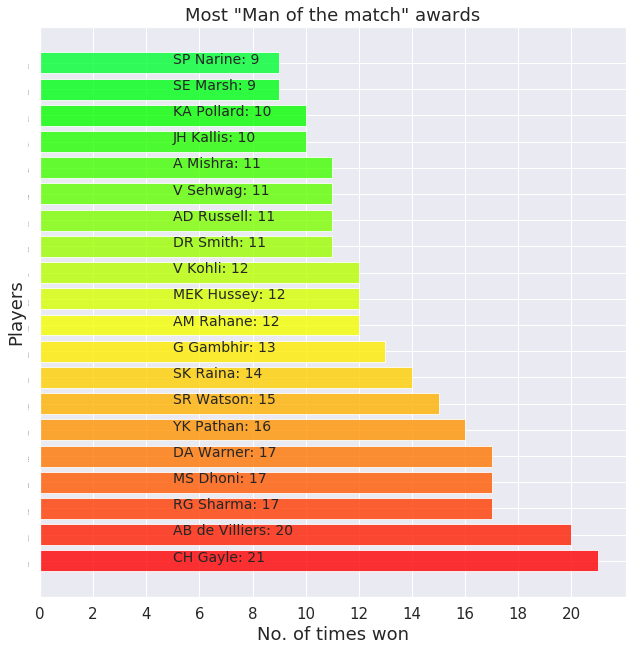

In [139]:
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
plt.yticks(rotation=90,fontsize=0)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.barh(players['name'], players['player_of_match'],color=plt.cm.hsv(np.arange(0,len(players)*5,5)),alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(5,count,players['name'][count]+': '+str(i),size=14)
    count+=1
plt.title('Most "Man of the match" awards',fontsize=18)
plt.xlabel('No. of times won',fontsize=18)
plt.ylabel('Players',fontsize=18)

<center><font size=4><b>Matches hosted in each city</b></font></center>
* Mumbai has hosted most no. of matches by far(101).
* As expected, top 8 cities are home grounds for the teams.

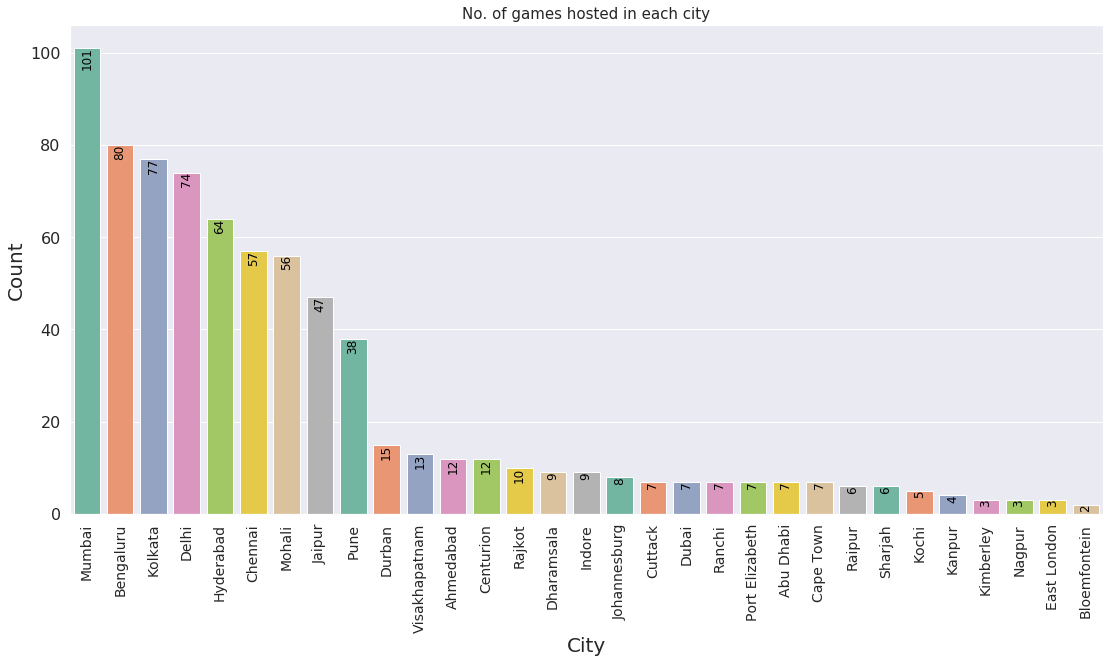

In [140]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(data['city'],order=data['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(data['city'].value_counts())
cities['name']=data['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

<center><font size=4><b>No. of matches hosted at each stadium</b></font></center>

In [141]:
data['venue'].value_counts().index

Index(['M Chinnaswamy Stadium', 'Eden Gardens', 'Feroz Shah Kotla Ground',
       'Wankhede Stadium', 'Rajiv Gandhi International Stadium, Uppal',
       'M. A. Chidambaram Stadium', 'IS Bindra Stadium',
       'Sawai Mansingh Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr DY Patil Sports Academy', 'Kingsmead', 'ACA-VDCA Stadium',
       'SuperSport Park', 'Sardar Patel Stadium, Motera', 'Brabourne Stadium',
       'Saurashtra Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'New Wanderers Stadium',
       'Sheikh Zayed Stadium', 'Newlands',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Dubai International Cricket Stadium', 'St George's Park',
       'Sharjah Cricket Stadium',
       'Shaheed Veer Narayan Singh International Stadium', 'Nehru Stadium',
       'Green Park', 'De Beers Diamond Oval', 'Buffalo Park',
       'Vidarbha Cricket Association Stadium, Jamtha', 'OUTsura

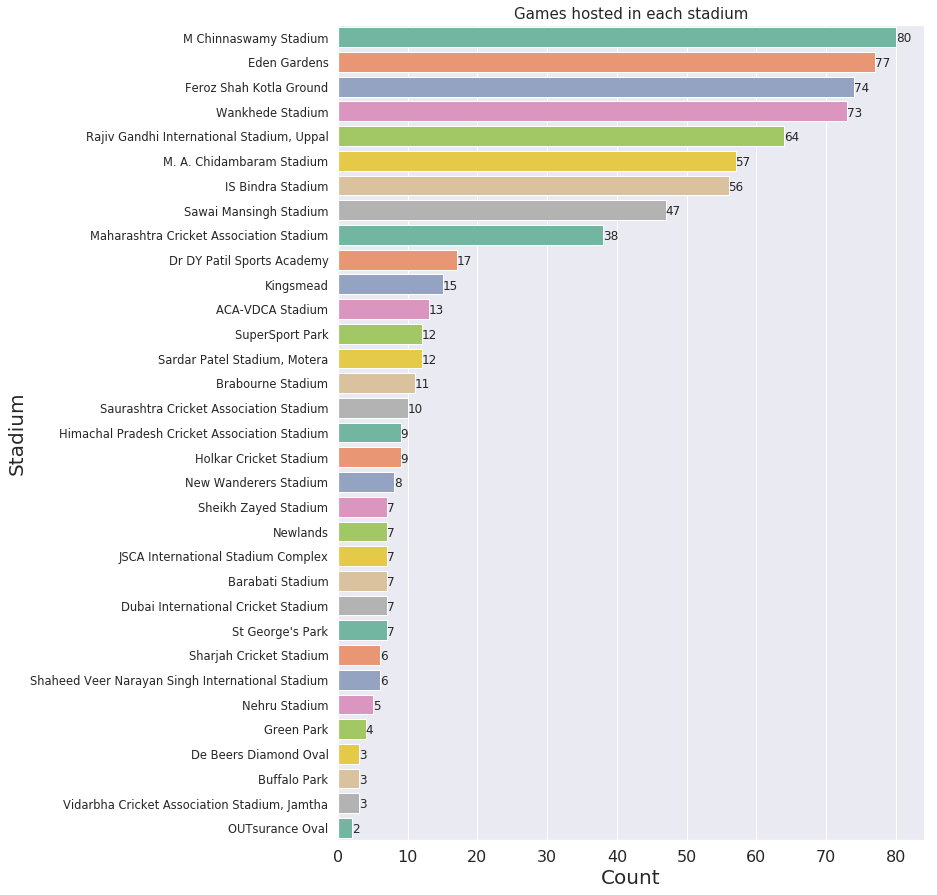

In [142]:
fig=plt.gcf()
fig.set_size_inches(10.5,15)

sns.countplot(y=data['venue'],order=data['venue'].value_counts().index,orient='v',palette='Set2')
plt.xticks(fontsize=16)
plt.yticks(fontsize=11.5)

plt.xlabel('Count',fontsize=20)
plt.ylabel('Stadium',fontsize=20)

plt.title('Games hosted in each stadium',fontsize=15)

count=0
venues=pd.DataFrame(data['venue'].value_counts())
venues['name']=data['venue'].value_counts().index
for i in venues['venue']:
    plt.text(i,count+0.2,str(i),size=12)
    count+=1
plt.show()

In [151]:
deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [203]:
stadium_stats = deliveries.loc[:,["batsman_runs"]].reset_index()
stadium_stats[(stadium_stats["batsman_runs"]==4)|(stadium_stats["batsman_runs"]==6)]
stadium_stats['boundary'] = stadium_stats["batsman_runs"].apply(lambda x: 1 if (x==4 or x==6) else 0)
stadium_stats['not_boundary'] = stadium_stats["boundary"].apply(lambda x: 0 if (x==1) else 1)
stadium_stats = stadium_stats.groupby('match_id').sum().drop('batsman_runs',axis=1).reset_index()

In [198]:
stadium_stats.head()

,match_id,boundary,not_boundary
0,1,49,199
1,2,47,200
2,3,52,166
3,4,38,209
4,5,36,212


In [204]:
stadium_stats = stadium_stats.merge(data.reset_index()[['id','venue']], how = 'inner',left_on='match_id', right_on = 'id').drop(['id','match_id'],axis=1)

In [218]:
stadium_stats = stadium_stats.groupby('venue').sum().sort_values("boundary",axis=0,ascending=False)
stadium_stats

,boundary,not_boundary
venue,,
M Chinnaswamy Stadium,3271,15132
Eden Gardens,3042,14949
Wankhede Stadium,2997,14593
Feroz Shah Kotla Ground,2871,14434
"Rajiv Gandhi International Stadium, Uppal",2329,12886
IS Bindra Stadium,2200,11071
M. A. Chidambaram Stadium,2052,11843
Sawai Mansingh Stadium,1719,9439
Maharashtra Cricket Association Stadium,1337,7782


In [224]:
cols = ['boundary','not_boundary']
tmp = stadium_stats.copy()
tmp[cols] = tmp[cols].div(tmp[cols].sum(axis=1), axis=0).multiply(100)
tmp["no_of_matches"] = venues['venue'][tmp.index]
tmp=tmp.sort_values('boundary',axis=0,ascending=False)
tmp

,boundary,not_boundary,no_of_matches
venue,,,
Green Park,20.304017,79.695983,4
Holkar Cricket Stadium,19.338422,80.661578,9
Himachal Pradesh Cricket Association Stadium,18.851320,81.148680,9
M Chinnaswamy Stadium,17.774276,82.225724,80
Brabourne Stadium,17.469658,82.530342,11
Saurashtra Cricket Association Stadium,17.219656,82.780344,10
Wankhede Stadium,17.038090,82.961910,73
Eden Gardens,16.908454,83.091546,77
Barabati Stadium,16.696165,83.303835,7


In [225]:
tmp[tmp["no_of_matches"]>20]

,boundary,not_boundary,no_of_matches
venue,,,
M Chinnaswamy Stadium,17.774276,82.225724,80
Brabourne Stadium,17.469658,82.530342,11
Wankhede Stadium,17.038090,82.961910,73
Eden Gardens,16.908454,83.091546,77
Feroz Shah Kotla Ground,16.590581,83.409419,74
IS Bindra Stadium,16.577500,83.422500,56
Sawai Mansingh Stadium,15.405987,84.594013,47
"Rajiv Gandhi International Stadium, Uppal",15.307263,84.692737,64
SuperSport Park,15.282624,84.717376,12
